<a href="https://colab.research.google.com/github/abhiramp1/LCLU_databytes/blob/main/LCLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot,patches,colors,ticker
from shapefile import Reader
import os

In [12]:
!git clone https://github.com/abhiramp1/LCLU_databytes.git

Cloning into 'LCLU_databytes'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 40 (delta 8), reused 21 (delta 3), pack-reused 0
Unpacking objects: 100% (40/40), 3.20 MiB | 2.06 MiB/s, done.


In [13]:
#provide the path to the required folders
bpath = "/content/LCLU_databytes/data/Payne_county/"
imag_path = "/content/LCLU_databytes/data/images"

(35.940687, 36.246541)

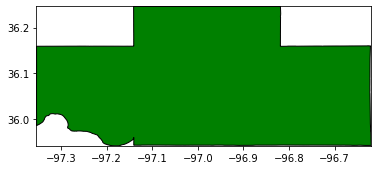

In [14]:
os.chdir(bpath)
sf = Reader("payne.shp")
%matplotlib inline

shape = sf.shape(0)

minx,miny,maxx,maxy = shape.bbox

fig = pyplot.figure()
ax = fig.add_subplot(111, aspect = 'equal')

points = []
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    point = [(i,j) for i,j in zip(x,y)]
    points.append(point)
    ax.add_patch(patches.Polygon(point, ec = 'k', fc = "green"))

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [20]:
#opening cdl image using gdal and storing the raster arrays in a list
os.chdir(imag_path)
os.listdir()
# arr_list = []
# for img in os.listdir():
#   print(img)
#   rimage = gdal.Open(img)
#   band = rimage.GetRasterBand(1)
  #rarray = band.ReadAsArray()
  #arr_list.append(rarray)

['LCLU_databytes',
 'CDL_2020_clip_20230329101614_1349936043.tif',
 'CDL_2021_clip_20230329101542_1252696564.tif',
 'CDL_2022_clip_20230329100355_933703418.tif']

In [7]:
#This indicates that the three images are stored as arrays inside a list
len(arr_list)

3

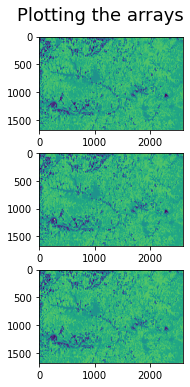

In [8]:
#defining subplot grid
fig, axs = pyplot.subplots(nrows=3, ncols=1, figsize=(12, 6))
pyplot.subplots_adjust(hspace=0.25)
fig.suptitle("Plotting the arrays", fontsize=18, y=0.95)

axs[0].imshow(arr_list[0])
axs[1].imshow(arr_list[1])
axs[2].imshow(arr_list[2])

In [9]:
print(np.unique(arr_list[0]), np.unique(arr_list[1]), np.unique(arr_list[2]))

[  0   1   2   4   5   6  10  21  24  26  27  28  29  31  36  37  42  44
  53  57  58  59  61  74 111 121 122 123 124 131 141 142 143 152 176 190
 195 205 225 226 236 240 241] [  0   1   2   4   5  10  21  24  26  27  28  29  31  36  37  44  53  57
  59  61  74 111 121 122 123 124 131 141 142 143 152 176 190 195 205 225
 236 240] [  0   1   2   4   5   6  10  21  24  26  27  28  29  31  36  37  44  53
  59  61  70  74 111 121 122 123 124 131 141 142 143 152 176 190 195 205
 225 236 238]
